In [1]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
URL = 'https://www.mohfw.gov.in/'
SHORT_HEADERS = ['S No', 'State','Indian and Foreign-Confirmed', 'Cured','Death'] 

response = requests.get(URL).content 
soup = BeautifulSoup(response, 'html.parser') 
header = extract_contents(soup.tr.find_all('th')) 
  
stats = [] 
all_rows = soup.find_all('tr') 
  
for row in all_rows: 
    stat = extract_contents(row.find_all('td')) 
    if stat: 
        if len(stat) == 4: 
            # last row 
            stat = ['', *stat] 
            stats.append(stat) 
        elif len(stat) == 5: 
            stats.append(stat) 
  
stats[-1][1] = "Total Cases"
  
stats.remove(stats[-1])

In [8]:
objects = []
deaths = []
for row in stats : 
    objects.append(row[1])
    deaths.append(row[4])
y_pos = np.arange(len(objects))

performance = [] 
for row in stats :
    performance.append(int(row[2]))
    deaths.append(row[4])
maxm = max(performance)
table = tabulate(stats, headers = SHORT_HEADERS)

In [9]:
print(table)

  S No  State                          Indian and Foreign-Confirmed    Cured    Death
------  ---------------------------  ------------------------------  -------  -------
     1  Andaman and Nicobar Islands                              33       32        0
     2  Andhra Pradesh                                         1717      589       36
     3  Arunachal Pradesh                                         1        1        0
     4  Assam                                                    43       32        1
     5  Bihar                                                   536      142        4
     6  Chandigarh                                              111       21        1
     7  Chhattisgarh                                             59       36        0
     8  Dadar Nagar Haveli                                        1        0        0
     9  Delhi                                                  5104     1468       64
    10  Goa                                           

In [10]:
print(objects)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal']


In [22]:
print(maxm)
limit = 1
while(maxm != 0):
    ter = (maxm % 10)
    limit = (limit * 10)
    maxm = (maxm // 10)
lim = int (((ter + 1) * limit)/ 10);

0


In [23]:
lim

0

In [24]:
print(y_pos)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]


In [25]:
print(objects)

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal']


In [26]:
print(performance)

[33, 1717, 1, 43, 536, 111, 59, 1, 5104, 7, 6245, 548, 42, 741, 125, 671, 502, 41, 3049, 15525, 2, 12, 1, 175, 9, 1451, 3158, 4058, 1096, 43, 61, 2880, 1344]


In [38]:
print(deaths)

['0', '36', '0', '1', '4', '1', '0', '0', '64', '0', '368', '6', '2', '8', '3', '29', '4', '0', '176', '617', '0', '1', '0', '1', '0', '25', '89', '33', '29', '0', '1', '56', '140', '0', '36', '0', '1', '4', '1', '0', '0', '64', '0', '368', '6', '2', '8', '3', '29', '4', '0', '176', '617', '0', '1', '0', '1', '0', '25', '89', '33', '29', '0', '1', '56', '140']


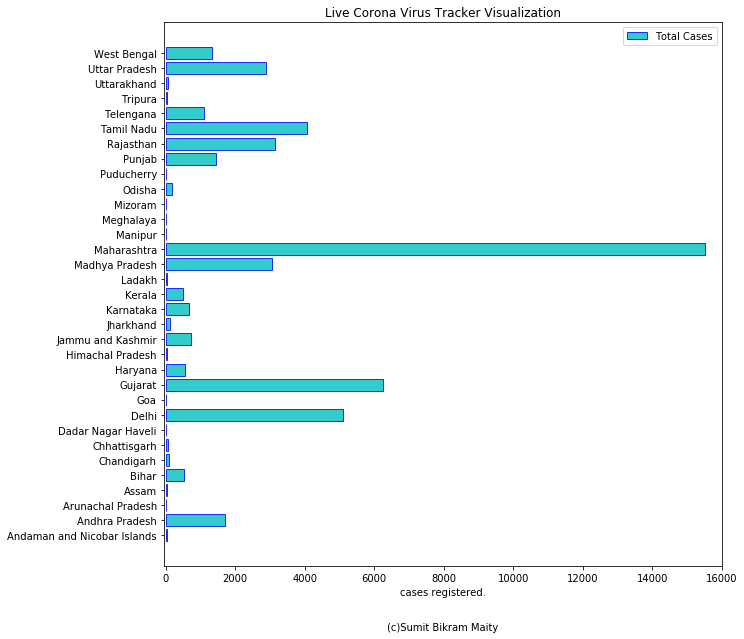

In [39]:
plt.figure(figsize = (10, 10))
plt.barh(y_pos, performance, align = 'center', alpha = 0.8, color = 'c',edgecolor = 'b', label = 'Total Cases')

plt.yticks(y_pos, objects) 
plt.xlim(-50, 16000)
#changr the 16,000 range to its height possible case...
plt.title('Live Corona Virus Tracker Visualization')
plt.xlabel('cases registered.\n\n\n(c)Sumit Bikram Maity')
plt.legend()
plt.show()

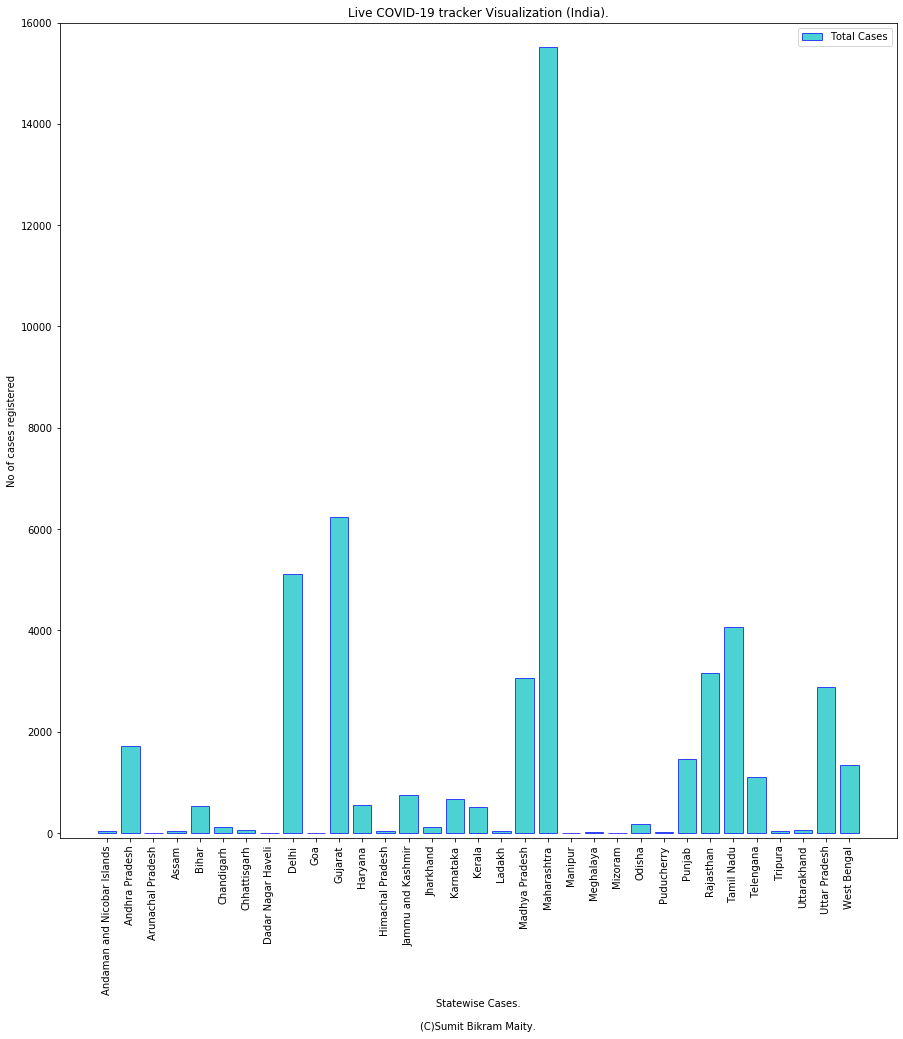

In [41]:
plt.figure(figsize=(15, 15))
plt.bar(objects, performance, width = .8, alpha = 0.7, align = 'center', 
                            color = 'c',edgecolor = 'b', label = 'Total Cases')
plt.ylim(-100, 16000)
plt.tick_params(axis='x', rotation = 90)
plt.ylabel('No of cases registered')
plt.xlabel('(c)Sumit Bikram Maity. ')
plt.xlabel('Statewise Cases.\n\n(C)Sumit Bikram Maity.')
plt.title('Live COVID-19 tracker Visualization (India).')
plt.legend()
plt.show()